In [92]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [93]:
import os
import datetime
import string

import pandas as pd
import numpy as np
import matplotlib

import sqlalchemy

Citi Bike Data Overview

In [94]:
df_bike = pd.DataFrame()

In [95]:
for file in sorted(os.listdir('data')):
    if file.startswith('JC'):
        df_temp = pd.read_csv('data/' + file)

        df_bike = pd.concat([df_bike, df_temp], axis=0)
        
# reset the index after concatenation
df_bike.reset_index(drop=True, inplace=True)

# add an ID column -- this will be useful for counts and eventually a primary key
df_bike['id'] = df_bike.index

In [96]:
df_bike.head(3)

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,id
0,362,2016-01-01 00:02:52,2016-01-01 00:08:54,3186,Grove St PATH,40.719586,-74.043117,3209,Brunswick St,40.724176,-74.050656,24647,Subscriber,1964.0,2,0
1,200,2016-01-01 00:18:22,2016-01-01 00:21:42,3186,Grove St PATH,40.719586,-74.043117,3213,Van Vorst Park,40.718489,-74.047727,24605,Subscriber,1962.0,1,1
2,202,2016-01-01 00:18:25,2016-01-01 00:21:47,3186,Grove St PATH,40.719586,-74.043117,3213,Van Vorst Park,40.718489,-74.047727,24689,Subscriber,1962.0,2,2


In [97]:
df_bike.tail(3)

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,id
247581,173,2016-12-31 23:44:37,2016-12-31 23:47:31,3186,Grove St PATH,40.719586,-74.043117,3270,Jersey & 6th St,40.725289,-74.045572,24641,Subscriber,1978.0,1,247581
247582,2424,2016-12-31 23:44:50,2017-01-01 00:25:14,3214,Essex Light Rail,40.712774,-74.036486,3214,Essex Light Rail,40.712774,-74.036486,26219,Subscriber,1960.0,2,247582
247583,2419,2016-12-31 23:44:50,2017-01-01 00:25:10,3214,Essex Light Rail,40.712774,-74.036486,3214,Essex Light Rail,40.712774,-74.036486,24471,Subscriber,1956.0,1,247583


In [98]:
df_bike.describe()

,Trip Duration,Start Station ID,Start Station Latitude,Start Station Longitude,End Station ID,End Station Latitude,End Station Longitude,Bike ID,Birth Year,Gender,id
count,2.475840e+05,247584.000000,247584.000000,247584.000000,247584.000000,247584.000000,247584.000000,247584.000000,228585.000000,247584.000000,247584.000000
mean,8.856305e+02,3207.065206,40.723121,-74.046438,3203.572553,40.722594,-74.045855,24935.260481,1979.335276,1.123534,123791.500000
std,3.593798e+04,26.955103,0.008199,0.011211,61.579494,0.007958,0.011283,748.469712,9.596809,0.518687,71471.488861
min,6.100000e+01,3183.000000,40.692640,-74.096937,147.000000,40.692216,-74.096937,14552.000000,1900.000000,0.000000,0.000000
25%,2.480000e+02,3186.000000,40.717732,-74.050656,3186.000000,40.716540,-74.050444,24491.000000,1974.000000,1.000000,61895.750000
50%,3.900000e+02,3201.000000,40.721525,-74.044247,3199.000000,40.721124,-74.043117,24609.000000,1981.000000,1.000000,123791.500000
75%,6.660000e+02,3211.000000,40.727596,-74.038051,3211.000000,40.727224,-74.036486,24719.000000,1986.000000,1.000000,185687.250000
max,1.632981e+07,3426.000000,40.752559,-74.032108,3426.000000,40.801343,-73.957390,27274.000000,2000.000000,2.000000,247583.000000


In [99]:
df_bike.isna().sum()

Trip Duration                  0
Start Time                     0
Stop Time                      0
Start Station ID               0
Start Station Name             0
Start Station Latitude         0
Start Station Longitude        0
End Station ID                 0
End Station Name               0
End Station Latitude           0
End Station Longitude          0
Bike ID                        0
User Type                    380
Birth Year                 18999
Gender                         0
id                             0
dtype: int64

In [100]:
df_bike.dtypes

Trip Duration                int64
Start Time                  object
Stop Time                   object
Start Station ID             int64
Start Station Name          object
Start Station Latitude     float64
Start Station Longitude    float64
End Station ID               int64
End Station Name            object
End Station Latitude       float64
End Station Longitude      float64
Bike ID                      int64
User Type                   object
Birth Year                 float64
Gender                       int64
id                           int64
dtype: object

In [101]:
# casting objects as timestamps
df_bike['Start Time'] = pd.to_datetime(df_bike['Start Time'],infer_datetime_format=True)
df_bike['Stop Time'] = pd.to_datetime(df_bike['Stop Time'],infer_datetime_format=True)
df_bike.dtypes

C:\Users\vanwy\AppData\Local\Temp\ipykernel_28004\2906839935.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_bike['Start Time'] = pd.to_datetime(df_bike['Start Time'],infer_datetime_format=True)
C:\Users\vanwy\AppData\Local\Temp\ipykernel_28004\2906839935.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_bike['Stop Time'] = pd.to_datetime(df_bike['Stop Time'],infer_datetime_format=True)


Trip Duration                       int64
Start Time                 datetime64[ns]
Stop Time                  datetime64[ns]
Start Station ID                    int64
Start Station Name                 object
Start Station Latitude            float64
Start Station Longitude           float64
End Station ID                      int64
End Station Name                   object
End Station Latitude              float64
End Station Longitude             float64
Bike ID                             int64
User Type                          object
Birth Year                        float64
Gender                              int64
id                                  int64
dtype: object

In [102]:
df_bike.columns = [x.replace(' ','_').lower() for x in df_bike.columns]

In [103]:
df_bike['age'] = 2016 - df_bike['birth_year'].values
df_bike['age'].sort_values(ascending=False)[:10]

215055    116.0
136211     82.0
180373     79.0
213567     79.0
187190     79.0
164274     79.0
149803     76.0
112336     76.0
177320     76.0
24596      75.0
Name: age, dtype: float64

In [104]:
df_bike.drop([215055], inplace=True)

In [105]:
missing_birth_year = df_bike[df_bike[['birth_year']].isnull().any(axis=1)]
missing_birth_year.head()

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,birth_year,gender,id,age
4,903,2016-01-01 01:03:20,2016-01-01 01:18:24,3195,Sip Ave,40.730743,-74.063784,3210,Pershing Field,40.742677,-74.051789,24573,Customer,NaN,0,4,NaN
5,883,2016-01-01 01:03:28,2016-01-01 01:18:11,3195,Sip Ave,40.730743,-74.063784,3210,Pershing Field,40.742677,-74.051789,24442,Customer,NaN,0,5,NaN
22,988,2016-01-01 03:16:33,2016-01-01 03:33:02,3196,Riverview Park,40.744319,-74.043991,3209,Brunswick St,40.724176,-74.050656,24662,Customer,NaN,0,22,NaN
53,3090,2016-01-01 11:07:15,2016-01-01 11:58:46,3203,Hamilton Park,40.727596,-74.044247,3203,Hamilton Park,40.727596,-74.044247,24444,Customer,NaN,0,53,NaN
57,788,2016-01-01 11:50:30,2016-01-01 12:03:39,3210,Pershing Field,40.742677,-74.051789,3195,Sip Ave,40.730743,-74.063784,24573,Customer,NaN,0,57,NaN


In [106]:
missing_birth_year['user_type'].value_counts(dropna=False)

user_type
Customer      15470
Subscriber     3529
Name: count, dtype: int64

In [107]:
missing_birth_year['gender'].value_counts()

gender
0    18999
Name: count, dtype: int64

In [108]:
missing_birth_year['user_type'].value_counts() / df_bike['user_type'].value_counts()

user_type
Customer      0.996714
Subscriber    0.015232
Name: count, dtype: float64

In [109]:
# the number of genders for which the missing user type records form more than 1% of the overall data
# there are no NAs in gender, so we don't need to worry about that
missing_user_type = df_bike[df_bike[['user_type']].isnull().any(axis=1)]
((missing_user_type['gender'] == 0) | (missing_user_type['birth_year'].isna())).sum()

np.int64(0)

In [110]:
missing_user_type.head()

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,birth_year,gender,id,age
25267,156,2016-03-23 09:08:34,2016-03-23 09:11:11,3214,Essex Light Rail,40.712774,-74.036486,3183,Exchange Place,40.716247,-74.033459,24444,NaN,1987.0,1,25267,29.0
25668,164,2016-03-23 22:17:45,2016-03-23 22:20:29,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,24675,NaN,1987.0,1,25668,29.0
25894,171,2016-03-24 11:46:39,2016-03-24 11:49:31,3214,Essex Light Rail,40.712774,-74.036486,3183,Exchange Place,40.716247,-74.033459,24697,NaN,1987.0,1,25894,29.0
26189,204,2016-03-24 20:45:45,2016-03-24 20:49:10,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,24387,NaN,1987.0,1,26189,29.0
26630,380,2016-03-25 19:15:56,2016-03-25 19:22:17,3183,Exchange Place,40.716247,-74.033459,3184,Paulus Hook,40.714145,-74.033552,24412,NaN,1987.0,1,26630,29.0


C:\Users\vanwy\AppData\Local\Temp\ipykernel_28004\1760279518.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  my = (missing_user_type.resample('M',on='start_time').count()['id']/len(missing_user_type)).rename('missing')
C:\Users\vanwy\AppData\Local\Temp\ipykernel_28004\1760279518.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dy = (df_bike.resample('M',on='start_time').count()['id']/len(df_bike)).rename('full')


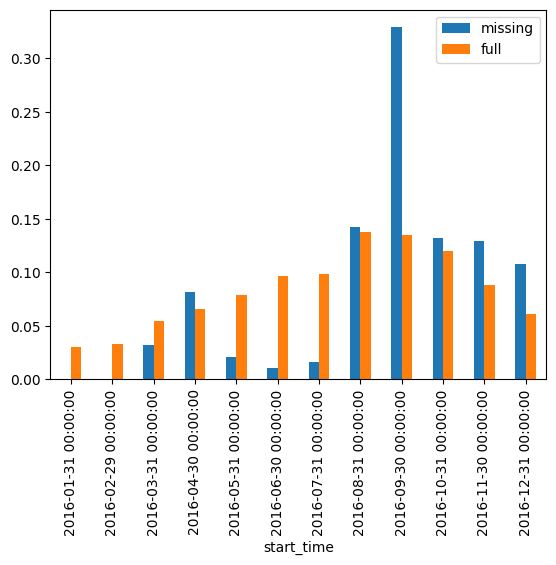

In [111]:
my = (missing_user_type.resample('M',on='start_time').count()['id']/len(missing_user_type)).rename('missing')
dy = (df_bike.resample('M',on='start_time').count()['id']/len(df_bike)).rename('full')
combo = pd.concat([my,dy],axis=1)


ax = combo.plot.bar();

In [112]:
df_bike.fillna({'user_type':'Unknown'},inplace=True)
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247583 entries, 0 to 247583
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   trip_duration            247583 non-null  int64         
 1   start_time               247583 non-null  datetime64[ns]
 2   stop_time                247583 non-null  datetime64[ns]
 3   start_station_id         247583 non-null  int64         
 4   start_station_name       247583 non-null  object        
 5   start_station_latitude   247583 non-null  float64       
 6   start_station_longitude  247583 non-null  float64       
 7   end_station_id           247583 non-null  int64         
 8   end_station_name         247583 non-null  object        
 9   end_station_latitude     247583 non-null  float64       
 10  end_station_longitude    247583 non-null  float64       
 11  bike_id                  247583 non-null  int64         
 12  user_type            

In [113]:
df_bike.groupby(['user_type','gender']).count()['id']

user_type   gender
Customer    0          15470
            1             36
            2             15
Subscriber  0           4431
            1         176898
            2          50353
Unknown     1            262
            2            118
Name: id, dtype: int64

In [114]:
# creating an easier to interpret trip time column in minutes and hours
df_bike['trip_minutes'] = round(df_bike['trip_duration'] / 60, 2)
df_bike['trip_hours'] = round(df_bike['trip_duration']/(60**2),2)
df_bike[['trip_duration','trip_minutes','trip_hours']].describe()

,trip_duration,trip_minutes,trip_hours
count,2.475830e+05,247583.000000,247583.000000
mean,8.856300e+02,14.760494,0.246006
std,3.593805e+04,598.967493,9.982797
min,6.100000e+01,1.020000,0.020000
25%,2.480000e+02,4.130000,0.070000
50%,3.900000e+02,6.500000,0.110000
75%,6.660000e+02,11.100000,0.180000
max,1.632981e+07,272163.470000,4536.060000


In [115]:
# create a column to flag rides that do not comply with system protocols
df_bike['valid_duration'] = df_bike['trip_duration'].apply(lambda x: 0 if x > 86400 else 1).astype(bool)

In [116]:
df_bike.reset_index(drop=True,inplace=True)
df_bike['id'] = df_bike.index
df_bike.tail()

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,birth_year,gender,id,age,trip_minutes,trip_hours,valid_duration
247578,557,2016-12-31 23:10:16,2016-12-31 23:19:33,3214,Essex Light Rail,40.712774,-74.036486,3203,Hamilton Park,40.727596,-74.044247,24465,Subscriber,1981.0,2,247578,35.0,9.28,0.15,True
247579,2749,2016-12-31 23:29:39,2017-01-01 00:15:29,3183,Exchange Place,40.716247,-74.033459,3183,Exchange Place,40.716247,-74.033459,24389,Customer,NaN,0,247579,NaN,45.82,0.76,True
247580,173,2016-12-31 23:44:37,2016-12-31 23:47:31,3186,Grove St PATH,40.719586,-74.043117,3270,Jersey & 6th St,40.725289,-74.045572,24641,Subscriber,1978.0,1,247580,38.0,2.88,0.05,True
247581,2424,2016-12-31 23:44:50,2017-01-01 00:25:14,3214,Essex Light Rail,40.712774,-74.036486,3214,Essex Light Rail,40.712774,-74.036486,26219,Subscriber,1960.0,2,247581,56.0,40.40,0.67,True
247582,2419,2016-12-31 23:44:50,2017-01-01 00:25:10,3214,Essex Light Rail,40.712774,-74.036486,3214,Essex Light Rail,40.712774,-74.036486,24471,Subscriber,1956.0,1,247582,60.0,40.32,0.67,True


In [117]:
df_weather = pd.read_csv('data/newark_airport_2016.csv')
df_weather.head()

,STATION,NAME,DATE,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,TSUN,WDF2,WDF5,WSF2,WSF5
0,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",2016-01-01,12.75,NaN,0.0,0.0,0.0,41,43,34,NaN,270,280.0,25.9,35.1
1,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",2016-01-02,9.40,NaN,0.0,0.0,0.0,36,42,30,NaN,260,260.0,21.0,25.1
2,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",2016-01-03,10.29,NaN,0.0,0.0,0.0,37,47,28,NaN,270,250.0,23.9,30.0
3,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",2016-01-04,17.22,NaN,0.0,0.0,0.0,32,35,14,NaN,330,330.0,25.9,33.1
4,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",2016-01-05,9.84,NaN,0.0,0.0,0.0,19,31,10,NaN,360,350.0,25.1,31.1


In [118]:
df_weather.describe()

,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,TSUN,WDF2,WDF5,WSF2,WSF5
count,366.000000,0.0,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,0.0,366.000000,364.000000,366.000000,364.000000
mean,9.429973,NaN,0.104945,0.098087,0.342623,57.196721,65.991803,48.459016,NaN,217.841530,228.269231,20.484426,26.801648
std,3.748174,NaN,0.307496,1.276498,2.078510,17.466981,18.606301,17.135790,NaN,102.548282,97.415777,6.848390,8.882610
min,2.460000,NaN,0.000000,0.000000,0.000000,8.000000,18.000000,0.000000,NaN,10.000000,10.000000,6.900000,10.100000
25%,6.765000,NaN,0.000000,0.000000,0.000000,43.000000,51.250000,35.000000,NaN,150.000000,150.000000,15.000000,19.900000
50%,8.720000,NaN,0.000000,0.000000,0.000000,56.000000,66.000000,47.000000,NaN,240.000000,260.000000,19.900000,25.100000
75%,11.410000,NaN,0.030000,0.000000,0.000000,74.000000,83.000000,64.000000,NaN,300.000000,300.000000,23.900000,31.100000
max,22.820000,NaN,2.790000,24.000000,20.100000,89.000000,99.000000,80.000000,NaN,360.000000,360.000000,48.100000,66.000000


In [119]:
df_weather.drop(['STATION','NAME','PGTM','TSUN', 'WDF2', 'WDF5', 'WSF2', 'WSF5'],axis=1, inplace=True)

In [120]:
df_weather.dtypes
df_weather.describe()

,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,9.429973,0.104945,0.098087,0.342623,57.196721,65.991803,48.459016
std,3.748174,0.307496,1.276498,2.078510,17.466981,18.606301,17.135790
min,2.460000,0.000000,0.000000,0.000000,8.000000,18.000000,0.000000
25%,6.765000,0.000000,0.000000,0.000000,43.000000,51.250000,35.000000
50%,8.720000,0.000000,0.000000,0.000000,56.000000,66.000000,47.000000
75%,11.410000,0.030000,0.000000,0.000000,74.000000,83.000000,64.000000
max,22.820000,2.790000,24.000000,20.100000,89.000000,99.000000,80.000000


In [121]:
df_weather.columns = ['rec_date','avg_wind','prcp','snow_amt','snow_depth','tavg','tmax','tmin']

In [122]:
# create convenience binary columns for weather events
df_weather['rain'] = df_weather['prcp'].apply(lambda x: 1 if x > 0 else 0).astype(bool)
df_weather['snow'] = df_weather['snow_amt'].apply(lambda x: 1 if x > 0 else 0).astype(bool)

In [123]:
# our data starts on 2016-01-01
start = datetime.datetime(2016,1,1)
# generate the remaining days of the year -- leap year!
date_col = [start + datetime.timedelta(x) for x in range(366)]
# create a dataframe
df_date = pd.DataFrame(date_col, dtype='datetime64[ns]')
df_date.columns = ['full_date']
df_date.head()

,full_date
0,2016-01-01
1,2016-01-02
2,2016-01-03
3,2016-01-04
4,2016-01-05


In [124]:
# generate month and day names
df_date['month'] = df_date['full_date'].apply(lambda x: x.month)
df_date['day'] = df_date['full_date'].apply(lambda x: x.day)
df_date['month_name'] = df_date['full_date'].apply(lambda x: x.strftime('%B'))
df_date['day_name'] = df_date['full_date'].apply(lambda x: x.strftime('%A'))
df_date['weekend'] = df_date['day_name'].apply(lambda x: 1 if (x == 'Saturday' or x=='Sunday') else 0).astype(bool)
df_date.head()

,full_date,month,day,month_name,day_name,weekend
0,2016-01-01,1,1,January,Friday,False
1,2016-01-02,1,2,January,Saturday,True
2,2016-01-03,1,3,January,Sunday,True
3,2016-01-04,1,4,January,Monday,False
4,2016-01-05,1,5,January,Tuesday,False


In [125]:
df_date['date_key'] = df_date['full_date'].apply(lambda x: int(x.strftime('%Y%m%d').strip('-')))
df_weather['date_key'] = df_weather['rec_date'].apply(lambda x: int(x.strftime('%Y%m%d').strip('-')))
df_bike['date_key'] = df_bike['start_time'].apply(lambda x: int(x.strftime('%Y%m%d').strip('-')))

# take a look at the head and tail of the date table
df_date.head()

AttributeError: 'str' object has no attribute 'strftime'

In [ ]:
df_date.tail()
df_date.dtypes

In [ ]:
# create a demographics table with all the unique demographics in the original dataset
trip_demo = df_bike[['user_type','birth_year','gender','age']].drop_duplicates(subset=['user_type','birth_year','gender']).reset_index(drop=True)
trip_demo['trip_demo'] = trip_demo.index

# add the trip_demo key to a rides table
rides = df_bike.merge(trip_demo, on=['user_type','birth_year','gender','age']).sort_values(by='id').reset_index(drop=True)

# drop the demographic info from rides
rides = rides.drop(['user_type','birth_year','gender','age'],axis=1)

rides.head()

In [ ]:
# first merge the two tables and
# - sort by ID to match df_bike's sorting
# - reset the index to match df_bike's index
# - drop the trip_demo join key
ridesmerge = rides.merge(trip_demo,on='trip_demo').sort_values(by='id').reset_index(drop=True).drop('trip_demo',axis=1)

# count the number of positions where ridesmerge is different from df_bike
# note that NaN != NaN, so we also need to make sure at least one isn't NaN
(df_bike.ne(ridesmerge) & (df_bike.notna() | ridesmerge.notna())).sum()

In [ ]:
# change the name of the trip_demo id column for the database
trip_demo.rename(columns={'trip_demo':'id'}, inplace=True)
trip_demo.head()

In [ ]:
# create tables of start stations and end stations
starts = rides[['start_station_id','start_station_name','start_station_latitude','start_station_longitude']]
ends = rides[['end_station_id','end_station_name','end_station_latitude','end_station_longitude']]

# rename so both start and end dataframes have the same column names
starts.columns = ['id','station_name','latitude','longitude']
ends.columns = ['id','station_name','latitude','longitude']

# concatenate and drop duplicates
stations = pd.concat([starts,ends]).drop_duplicates()

# drop station names and locations from rides
rides = rides.drop(['start_station_name','start_station_latitude','start_station_longitude','end_station_name','end_station_latitude','end_station_longitude'],axis=1)

rides.head()

In [ ]:
stations.head()

In [ ]:
df_weather.head()

In [ ]:
# create a connection to the database
#url = 'postgresql+psycopg2://user_name@host_name:port_number/database_name' 
# replace with the appropriate values for your system

engine = sqlalchemy.create_engine('postgresql://localhost/citibike')
con = engine.connect()
df_date.to_sql('date_dim', con, if_exists='append',index=False,chunksize=10000)
stations.to_sql('stations', con, if_exists='append',index=False,chunksize=10000)
trip_demo.to_sql('trip_demo', con, if_exists='append',index=False,chunksize=10000)
df_weather.to_sql('weather', con, if_exists='append',index=False,chunksize=10000)
rides.to_sql('rides', con, if_exists='append',index=False,chunksize=10000)

con.close()